# Chapitre 10

##### 10.1 Collecte des données avec Quandl et yahoo finance

In [2]:
import numpy as np
import pandas as pds
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [8]:
#data_0 = quandl.get("AAII/AAII_SENTIMENT", authtoken="Votre_token")
data_0 = pds.read_csv("sp500.csv", index_col="Date", parse_dates=True)
nq100 = pds.read_csv("nq100.csv", index_col="Date", parse_dates=True)
gold = pds.read_csv("GOLD.csv", index_col="Date", parse_dates=True)
russel = pds.read_csv("russel.csv", index_col="Date", parse_dates=True)
devises = pds.read_csv("Devises.csv", index_col="Date", parse_dates=True)
devises

,Open EUR/CAD,Open EUR/CHF,Open USD/CAD,Open EUR/GBP,Open EUR/USD,Open EUR/CNY
Date,,,,,,
2005-01-03,1.63020,1.54490,1.20020,0.70740,1.358105,11.1131
2005-01-04,1.62660,1.54520,1.20800,0.70680,1.347001,11.1338
2005-01-05,1.62220,1.55090,1.22100,0.70510,1.328304,10.9915
2005-01-06,1.62510,1.54970,1.22430,0.70370,1.327898,10.9538
2005-01-07,1.62830,1.54680,1.23520,0.70240,1.318200,10.9004
...,...,...,...,...,...,...
2018-12-26,1.55034,1.12571,1.35850,0.89939,1.141344,7.8149
2018-12-27,1.54183,1.12961,1.35739,0.89811,1.136364,7.8149
2018-12-28,1.55688,1.12847,1.36210,0.90386,1.143092,7.8416


In [9]:
nq100["Open NQ100"] = nq100["Open"]
gold["Open GOLD"] = gold["Open"]
russel["Open RUSSEL"] = russel["Open"]
sp500_ = data_0[["S&P 500 Weekly Close"]]

colonne = ["Bullish", "Bearish"]
bd_ = pds.concat((data_0[colonne],
                 sp500_,
                nq100["Open NQ100"],
                gold["Open GOLD"],
                russel["Open RUSSEL"],
                devises["Open EUR/CAD"],
                  devises["Open EUR/CHF"],
                  devises["Open EUR/CNY"],
                  devises["Open EUR/GBP"],
                  devises["Open USD/CAD"],
                devises["Open EUR/USD"]), axis=1).dropna()



In [10]:
round(bd_.corr(),2)

,Bullish,Bearish,S&P 500 Weekly Close,Open NQ100,Open GOLD,Open RUSSEL,Open EUR/CAD,Open EUR/CHF,Open EUR/CNY,Open EUR/GBP,Open USD/CAD,Open EUR/USD
Bullish,1.00,-0.58,-0.13,-0.15,0.16,-0.11,-0.11,0.24,0.22,-0.08,-0.24,0.18
Bearish,-0.58,1.00,-0.37,-0.36,0.32,-0.41,0.20,0.40,0.38,-0.04,-0.15,0.31
S&P 500 Weekly Close,-0.13,-0.37,1.00,0.99,-0.74,0.99,0.07,-0.68,-0.66,0.22,0.61,-0.61
Open NQ100,-0.15,-0.36,0.99,1.00,-0.71,0.98,0.07,-0.74,-0.72,0.33,0.62,-0.62
Open GOLD,0.16,0.32,-0.74,-0.71,1.00,-0.72,-0.27,0.48,0.59,0.09,-0.79,0.70
Open RUSSEL,-0.11,-0.41,0.99,0.98,-0.72,1.00,0.01,-0.73,-0.70,0.27,0.56,-0.59
Open EUR/CAD,-0.11,0.20,0.07,0.07,-0.27,0.01,1.00,0.31,0.31,0.03,0.47,0.15
Open EUR/CHF,0.24,0.40,-0.68,-0.74,0.48,-0.73,0.31,1.00,0.93,-0.47,-0.37,0.60
Open EUR/CNY,0.22,0.38,-0.66,-0.72,0.59,-0.70,0.31,0.93,1.00,-0.39,-0.48,0.73
Open EUR/GBP,-0.08,-0.04,0.22,0.33,0.09,0.27,0.03,-0.47,-0.39,1.00,-0.04,0.09


##### 10.2 Préparation des données

In [11]:
bd = bd_.pct_change(1).dropna().reset_index(drop=True)
bd["Étiquetage"] = round(bd["Open EUR/USD"]+0.5)

In [12]:
##### Scindage en en jeu de train et jeu de visualisation
##### On met un intervalle d'écart de une période
X_train = bd.iloc[0:600-1,:].values
X_visu = bd.iloc[600:700-1,:].values

y_train = bd[["Étiquetage"]].iloc[1:600,:].values
y_visu = bd[["Étiquetage"]].iloc[600+1:700,:].values


##### Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Xtrain_sc = sc.fit_transform(X_train)
Xvisu_sc = sc.transform(X_visu)

##### 10.3 Modélisation

In [13]:
from sklearn.linear_model import LogisticRegression
cl = LogisticRegression()



cl.fit(X_train, y_train)
y_pred = cl.predict(X_visu)
    
y_pred = y_pred.reshape(len(y_pred),1)

In [14]:
##### Fonction gain pour les classificateurs
def mesure_classifieur(y_pred, tx_visu, spread=0.00050, levier=1):
    # Initialisation
    l = len(y_pred)
    gain = np.zeros(l).reshape(l,1)
    hausse = np.zeros(l).reshape(l,1)
    baisse = np.zeros(l).reshape(l,1)
    
    y_pred = y_pred.reshape(len(y_pred),1)
    count_true = 0
    count_false = 0
    p = 0
    
    #Gain
    for i in range(l):
        if y_pred[i][0]==1:
            gain[i][0] = (tx_visu[i][0]-spread)*levier
            hausse[i][0] = (tx_visu[i][0]-spread)*levier
        if y_pred[i][0]==0:
            gain[i][0] = (-tx_visu[i][0]-spread)*levier
            baisse[i][0] = (-tx_visu[i][0]-spread)*levier
    
    # Affichage
    moyenne = np.mean(gain[gain!=0])
    ecart_type = np.std(gain[gain!=0])
    
    # Croissance
    coef = 1
    coef_ = np.zeros(l).reshape(l,1)

    for i in range(l):
        coef *= (1+gain[i][0])
        coef_[i][0] = coef
        
    pourcentage = (coef-1)*100
    
    
    sharpe = moyenne/ecart_type
    
    sortino = np.mean(gain[gain!=0])/np.std(gain[gain<0])
    
    #Mesures
    somme_gain_h = round(sum(hausse)[0]*100,2)
    somme_gain_b = round(sum(baisse)[0]*100,2)
    
    
    gain_max_hausse = round(np.max(hausse, axis=0)[0]*100,2)
    gain_min_hausse = round(np.min(hausse, axis=0)[0]*100,2)
    
    
    gain_max_baisse = round(np.max(baisse, axis=0)[0]*100,2)
    gain_min_baisse = round(np.min(baisse, axis=0)[0]*100,2)
    
    for i in range(l):
        if gain[i][0]>0:
            count_true += 1
        elif gain[i][0]<0:
            count_false += 1
    
    if count_false == 0 and count_true == 0:
        p="On ne peut pas calculer de probabilité"
    else:
        p = count_true/(count_false+count_true)
    
    
    print("------------------ Données de bases -----------------------")
    print("Spread", spread)
    print("Effet de levier:",levier)
    print("                                                           ")
    print("---------------------- Mesures ----------------------------")
    print("Précision", round(p,2), "%")
    print("Pourcentage sur la période:", round(np.sum(gain)*100,2), "%")
    print("Poucentage composé:", round(pourcentage,2), "%")
    print("Ratio gain par trade:", round(moyenne*100,2), "%")
    print("Écart-type des gains:", round(ecart_type*100,2), "%")
    print("Ratio Sharpe:", round(sharpe,6))
    print("Ratio Sortino:", round(sortino,6))
    print("                                                           ")
    print("-------------------- Autres données -----------------------")
    print("Somme des gains à la hausse:", somme_gain_h, "%")
    print("Somme des gains à la baisse:", somme_gain_b, "%")
    print("gain max a la hausse:",gain_max_hausse, "%")
    print("gain min a la hausse:",gain_min_hausse, "%")
    print("gain max a la baisse:",gain_max_baisse, "%")
    print("gain min a la baisse:",gain_min_baisse, "%")
    print("                                                           ")
    print("-------------------- Distribution -----------------------")
    plt.title("Distribution gain")
    plt.hist(gain[gain!=0]*100,bins=55)
    plt.axvline(0, color="black")
    plt.xlabel("Pourcentage gain")
    plt.show()
    print("                                                           ")
    print("-------------------- Croissance -----------------------")
    plt.plot((coef_-1)*100,color="green")
    plt.title("Croissance Portefeuille")
    plt.ylabel("Gain(pourcentage)")
    plt.show()

------------------ Données de bases -----------------------
Spread 0.0005
Effet de levier: 1
                                                           
---------------------- Mesures ----------------------------
Précision 0.6 %
Pourcentage sur la période: 8.71 %
Poucentage composé: 8.56 %
Ratio gain par trade: 0.09 %
Écart-type des gains: 1.0 %
Ratio Sharpe: 0.087845
Ratio Sortino: 0.144473
                                                           
-------------------- Autres données -----------------------
Somme des gains à la hausse: 7.89 %
Somme des gains à la baisse: 0.82 %
gain max a la hausse: 2.6 %
gain min a la hausse: -1.85 %
gain max a la baisse: 2.25 %
gain min a la baisse: -2.18 %
                                                           
-------------------- Distribution -----------------------


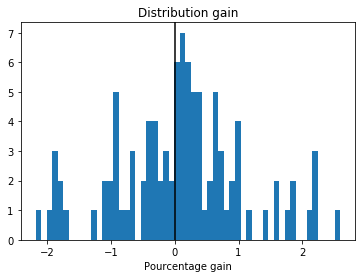

                                                           
-------------------- Croissance -----------------------


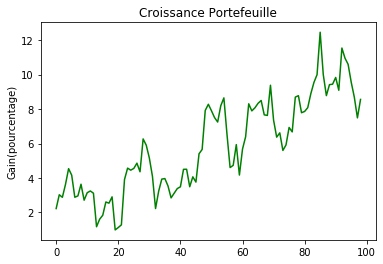

In [15]:
tx_visu = bd[["Open EUR/USD"]].iloc[600+1:700,:].values


matrice = mesure_classifieur(y_pred, tx_visu, spread = 0.00050, levier=1)

##### 10.4 Amélioration

In [16]:
nq100["Open NQ100"] = nq100["Open"]
gold["Open GOLD"] = gold["Open"]
russel["Open RUSSEL"] = russel["Open"]
sp500_ = data_0[["S&P 500 Weekly Close"]]

colonne = ["Bullish", "Bearish"]
bd_ = pds.concat((#data_0[colonne],
                 #sp500_,
                nq100["Open NQ100"],
                gold["Open GOLD"],
                russel["Open RUSSEL"],
                devises["Open EUR/CAD"],
                  devises["Open EUR/CHF"],
                  devises["Open EUR/CNY"],
                  devises["Open EUR/GBP"],
                  devises["Open USD/CAD"],
                devises["Open EUR/USD"]), axis=1).dropna()





In [17]:
bd = bd_.pct_change(1).dropna().reset_index(drop=True)
bd["Étiquetage"] = round(bd["Open EUR/USD"]+0.5)

In [18]:
##### Scindage en en jeu de train et jeu de visualisation
##### On met un intervalle d'écart de une période
a = 2800
l = len(bd)
X_train = bd.iloc[0:a-1,:].values
X_visu = bd.iloc[a:l-1,:].values

y_train = bd[["Étiquetage"]].iloc[1:a,:].values
y_visu = bd[["Étiquetage"]].iloc[a+1:l,:].values


##### Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Xtrain_sc = sc.fit_transform(X_train)
Xvisu_sc = sc.transform(X_visu)




In [19]:
from sklearn.linear_model import LogisticRegression
cl = LogisticRegression()



cl.fit(Xtrain_sc, y_train)
y_pred = cl.predict(Xvisu_sc)
    
y_pred = y_pred.reshape(len(y_pred),1)

------------------ Données de bases -----------------------
Spread 0.0005
Effet de levier: 1
                                                           
---------------------- Mesures ----------------------------
Précision 0.52 %
Pourcentage sur la période: 11.73 %
Poucentage composé: 11.56 %
Ratio gain par trade: 0.02 %
Écart-type des gains: 0.48 %
Ratio Sharpe: 0.035584
Ratio Sortino: 0.05666
                                                           
-------------------- Autres données -----------------------
Somme des gains à la hausse: 8.54 %
Somme des gains à la baisse: 3.18 %
gain max a la hausse: 1.84 %
gain min a la hausse: -2.65 %
gain max a la baisse: 2.01 %
gain min a la baisse: -1.23 %
                                                           
-------------------- Distribution -----------------------


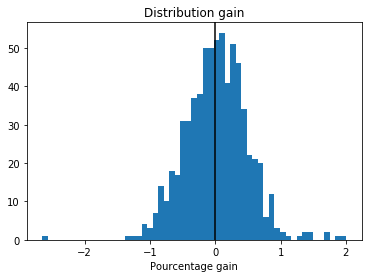

                                                           
-------------------- Croissance -----------------------


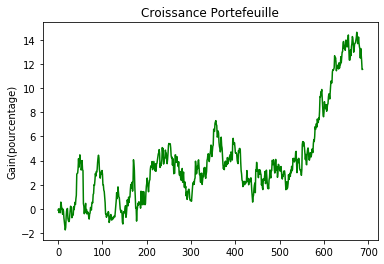

In [20]:
tx_visu = bd[["Open EUR/USD"]].iloc[a+1:l,:].values


matrice = mesure_classifieur(y_pred, tx_visu)

------------------ Données de bases -----------------------
Spread 0.0005
Effet de levier: 1
                                                           
---------------------- Mesures ----------------------------
Précision 0.52 %
Pourcentage sur la période: 4.48 %
Poucentage composé: 3.76 %
Ratio gain par trade: 0.01 %
Écart-type des gains: 0.48 %
Ratio Sharpe: 0.013571
Ratio Sortino: 0.021152
                                                           
-------------------- Autres données -----------------------
Somme des gains à la hausse: 3.57 %
Somme des gains à la baisse: 0.91 %
gain max a la hausse: 1.84 %
gain min a la hausse: -2.11 %
gain max a la baisse: 2.55 %
gain min a la baisse: -1.83 %
                                                           
-------------------- Distribution -----------------------


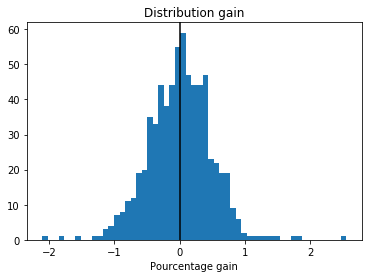

                                                           
-------------------- Croissance -----------------------


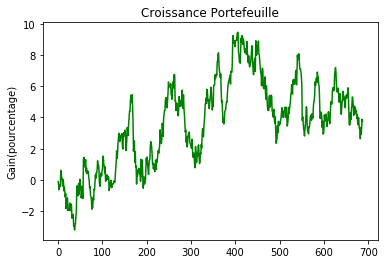

In [21]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier()



cl.fit(Xtrain_sc, y_train)
y_pred = cl.predict(Xvisu_sc)
    
y_pred = y_pred.reshape(len(y_pred),1)
mesure_classifieur(y_pred, tx_visu)

------------------ Données de bases -----------------------
Spread 0.0005
Effet de levier: 1
                                                           
---------------------- Mesures ----------------------------
Précision 0.52 %
Pourcentage sur la période: 12.76 %
Poucentage composé: 12.72 %
Ratio gain par trade: 0.02 %
Écart-type des gains: 0.48 %
Ratio Sharpe: 0.03875
Ratio Sortino: 0.062823
                                                           
-------------------- Autres données -----------------------
Somme des gains à la hausse: 9.16 %
Somme des gains à la baisse: 3.6 %
gain max a la hausse: 1.84 %
gain min a la hausse: -2.65 %
gain max a la baisse: 2.01 %
gain min a la baisse: -1.23 %
                                                           
-------------------- Distribution -----------------------


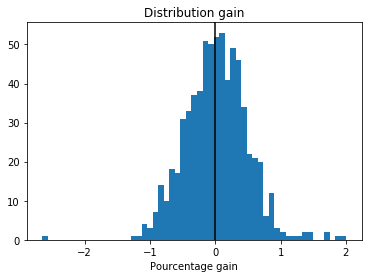

                                                           
-------------------- Croissance -----------------------


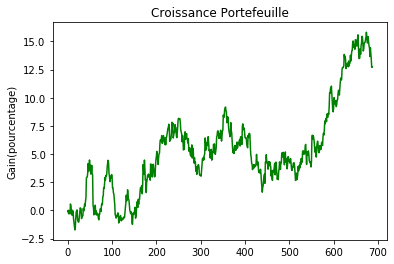

In [22]:
from sklearn.svm import LinearSVC
cl = LinearSVC(max_iter=10000)



cl.fit(Xtrain_sc, y_train)
y_pred = cl.predict(Xvisu_sc)
    
y_pred = y_pred.reshape(len(y_pred),1)
mesure_classifieur(y_pred, tx_visu)

##### 10.5 Performance

In [23]:
def validation_classificateur(y_pred, tx_visu, spread=0.00050, levier=1):
    # Initialisation
    l = len(y_pred)
    gain = np.zeros(l).reshape(l,1)
    hausse = np.zeros(l).reshape(l,1)
    baisse = np.zeros(l).reshape(l,1)
    
    y_pred = y_pred.reshape(len(y_pred),1)
    count_true = 0
    count_false = 0
    p = 0
    
    #Gain
    for i in range(l):
        if y_pred[i][0]==1:
            gain[i][0] = (tx_visu[i][0]-spread)*levier
            hausse[i][0] = (tx_visu[i][0]-spread)*levier
        if y_pred[i][0]==0:
            gain[i][0] = (-tx_visu[i][0]-spread)*levier
            baisse[i][0] = (-tx_visu[i][0]-spread)*levier
    
        # Croissance
    coef = 1
    coef_ = np.zeros(l).reshape(l,1)

    for i in range(l):
        coef *= (1+gain[i][0])
        coef_[i][0] = coef
        
    pourcentage = (coef-1)*100
    
        
    
    return pourcentage

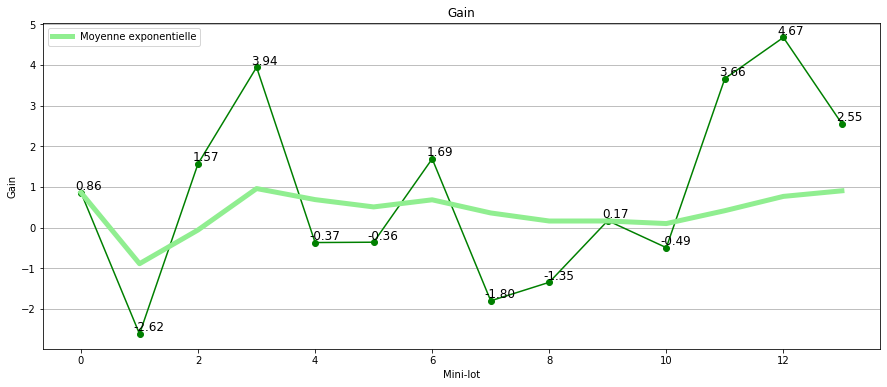

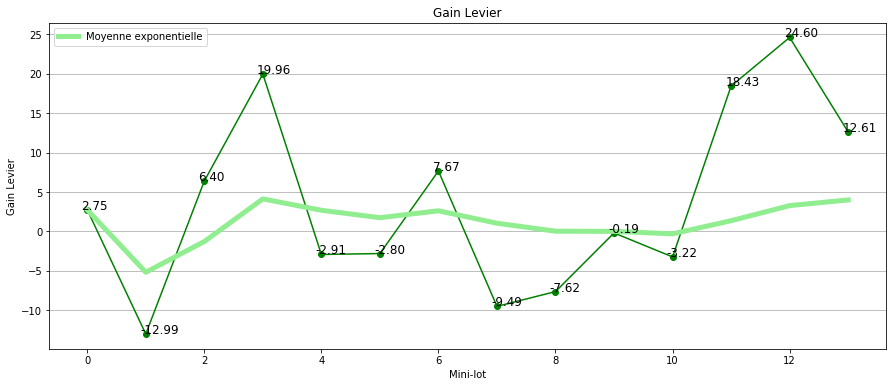

In [24]:
##### Scindage en en jeu de train et jeu de visualisation
##### On met un intervalle d'écart de une période
a = 2800
l = len(bd)
X_train = bd.iloc[0:a-1,:].values
X_visu = bd.iloc[a:l-1,:].values

y_train = bd[["Étiquetage"]].iloc[1:a,:].values
y_visu = bd[["Étiquetage"]].iloc[a+1:l,:].values


##### Standardisation
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

Xtrain_sc = sc.fit_transform(X_train)
Xvisu_sc = sc.transform(X_visu)



from sklearn.svm import LinearSVC
cl = LinearSVC(max_iter=10000)


cl.fit(Xtrain_sc, y_train)
y_pred = cl.predict(Xvisu_sc)
    
y_pred = y_pred.reshape(len(y_pred),1)
tx_visu = bd[["Open EUR/USD"]].iloc[a+1:l,:].values


matrice = np.concatenate((y_pred, tx_visu), axis=1)

gain = list()
gain_levier = list()


n = 15
for lot in range(1,n):
    taille = len(matrice)//n
    matrice_ = matrice[taille*lot:taille*(lot+1),:]
    
    gain_levier.append(validation_classificateur(matrice_[:,0:1], matrice_[:,1:2], spread=0.0005, levier=5))
    gain.append(validation_classificateur(matrice_[:,0:1], matrice_[:,1:2], spread=0.0005, levier=1))


plt.figure(figsize=(15,6))
plt.grid(axis="y")
plt.plot(gain, "o-", color="green")
plt.ylabel("Gain")
plt.xlabel("Mini-lot")
plt.plot(pds.DataFrame(np.array(gain)).ewm(com=85).mean().values, color="lightgreen", linewidth=5, label="Moyenne exponentielle")
plt.legend()
plt.title("Gain")
for i, j in zip([h for h in range(0,n-1)], gain):
            label = "{:.2f}".format(j)
            plt.annotate(label, (i, j), xytext=(i-0.1, j+.075), fontsize=12)
plt.show()

plt.figure(figsize=(15,6))
plt.grid(axis="y")
plt.plot(gain_levier, "o-", color="green")
plt.ylabel("Gain Levier")
plt.xlabel("Mini-lot")
plt.plot(pds.DataFrame(np.array(gain_levier)).ewm(com=85).mean().values, color="lightgreen", linewidth=5, label="Moyenne exponentielle")
plt.legend()
plt.title("Gain Levier")
for i, j in zip([h for h in range(0,n-1)], gain_levier):
            label = "{:.2f}".format(j)
            plt.annotate(label, (i, j), xytext=(i-0.1, j+.075), fontsize=12)
plt.show()

------------------ Données de bases -----------------------
Spread 0.0005
Effet de levier: 5
                                                           
---------------------- Mesures ----------------------------
Précision 0.52 %
Pourcentage sur la période: 63.02 %
Poucentage composé: 54.19 %
Ratio gain par trade: 0.09 %
Écart-type des gains: 2.39 %
Ratio Sharpe: 0.038261
Ratio Sortino: 0.061882
                                                           
-------------------- Autres données -----------------------
Somme des gains à la hausse: 44.4 %
Somme des gains à la baisse: 18.61 %
gain max a la hausse: 9.21 %
gain min a la hausse: -13.27 %
gain max a la baisse: 10.04 %
gain min a la baisse: -6.16 %
                                                           
-------------------- Distribution -----------------------


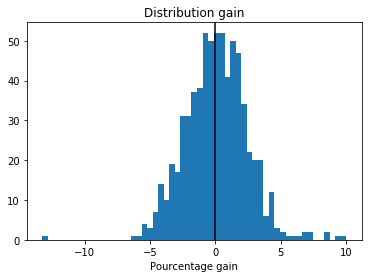

                                                           
-------------------- Croissance -----------------------


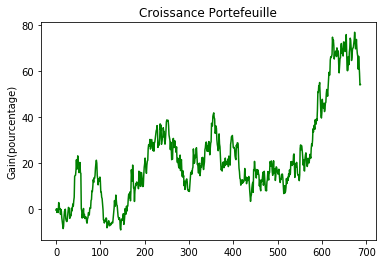

In [27]:
from sklearn.svm import LinearSVC
cl = LinearSVC(max_iter=10000)


cl.fit(Xtrain_sc, y_train)
y_pred = cl.predict(Xvisu_sc)




tx_visu = bd[["Open EUR/USD"]].iloc[a+1:l,:].values


matrice = mesure_classifieur(y_pred, tx_visu, spread=0.00050, levier=5)